<a href="https://colab.research.google.com/github/harrythu25/MNSIT_with_user_input/blob/master/MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the relevant packages


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Data

In [ ]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True, try_gcs=True)

In [ ]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

# Visualization 

11493376/11490434 [==============================] - 0s 0us/step


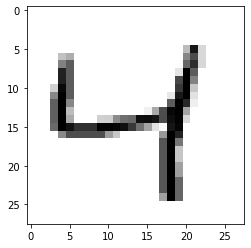

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[2], cmap='gray_r')

In [ ]:
x_train[2][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
         0,   0], dtype=uint8)

## Split between validation and training set

In [ ]:
#preparing the data sets before splitting
#take input and transform
def scale (image, label):
  image = tf.cast (image, tf.float32) #make sure it's float
  image /= 255. #values are between 0 and 255 based on the shades; divide everything by 255 so each input is between 0 and 1  
  return image, label


#scale the data
scaled_train_and_validation_data = mnist_train.map(scale) #use .map function to transform train data
test_data = mnist_test.map(scale) #use .map function to transform test data


#shuffle data so batches wont affect model
BUFFER_SIZE = 10000 

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

#Calculating sample sizes
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples #0.1 because only want 10%
num_validation_samples = tf.cast(num_validation_samples, tf.int64) #cast to integer

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64) #cast to integer
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)




# Model

## Outline the Model

In [ ]:
#Because I am going to use the mini batch gradient descent, I need to set the batch size
#setting batch size to prepare data for model

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE) #override .batch method with my size
validation_data = validation_data.batch(num_validation_samples)  #to take in the whole data set, 
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

#hyper parameters
input_size = 784 # 28px x 28px
output_size = 10 #0-9
hidden_layer_size = 100

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'), # first hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),  # second hidden layer
                             tf.keras.layers.Dense(output_size, activation='softmax') #output layer softmax to transform into probability since this is a classifier model
                            ])

## Choose the optimizer and the loss function

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

#this aplies one hot encoding which I did not do
#output and target layer nees to have same shape of one hot encoded format


## Training

In [ ]:
NUM_EPOCHS =5

training_results= model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2 )

Epoch 1/5
540/540 - 5s - loss: 0.3423 - accuracy: 0.9037 - val_loss: 0.1643 - val_accuracy: 0.9522
Epoch 2/5
540/540 - 4s - loss: 0.1425 - accuracy: 0.9586 - val_loss: 0.1133 - val_accuracy: 0.9658
Epoch 3/5
540/540 - 4s - loss: 0.1012 - accuracy: 0.9694 - val_loss: 0.0868 - val_accuracy: 0.9722
Epoch 4/5
540/540 - 4s - loss: 0.0760 - accuracy: 0.9762 - val_loss: 0.0690 - val_accuracy: 0.9813
Epoch 5/5
540/540 - 4s - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0671 - val_accuracy: 0.9803


# Test the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 417ms/step - loss: 0.0853 - accuracy: 0.9746


In [ ]:
print('Test loss: {0: .2}. Test accuracy: {1: .2f}%'.format(test_loss, test_accuracy*100.))

Test loss:  0.085. Test accuracy:  97.46%


## Implementation of Model 


I used pygame and a 28x 28 grid to allow the user to draw their number and implemented this model to predict it. Pygame does not work with online notebooks so go to my github repo for the full project


https://github.com/harrythu25/MNSIT_with_user_input

# Visualization

In [ ]:
training_results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

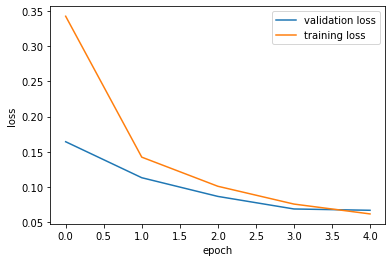

In [ ]:
plt.plot(training_results.history['val_loss'])
plt.plot(training_results.history['loss'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

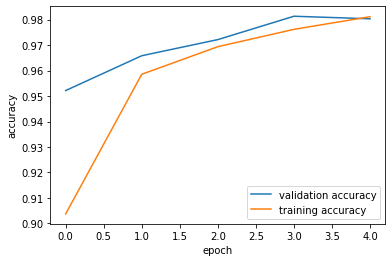

In [ ]:
plt.plot(training_results.history['val_accuracy'])
plt.plot(training_results.history['accuracy'])
plt.legend(['validation accuracy','training accuracy'], loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()